# Analyse du délai de livraison 

L'objectif d'analyser les délais de livraison du magasin Superstore afin de déterminer quels sont les déterminants du délai de livraison
1. Analyse exploratoire des données
2. Visualisation des distributions et corrélation
3. Test d'hypothèses 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [42]:
df = pd.read_excel("../data/Sample-Superstore.xlsx", sheet_name = "Orders", header= 0)
df.head()

d:\Study\cours_d_info\Data science\Business analysis\Projet_BI_performance_commerciale\env\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [44]:
df["Shipping Duration"] = df["Ship Date"] - df["Order Date"]
df["Shipping Duration"] = df["Shipping Duration"].dt.days
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Duration
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7


In [45]:
extented_stats = df[["Sales","Quantity","Profit","Shipping Duration"]].describe().T

extented_stats["Mode"] = df[["Sales","Quantity","Profit","Shipping Duration"]].mode().iloc[0]
extented_stats["Range"] = extented_stats["max"] - extented_stats["min"]
extented_stats["IQR"] = df[["Sales","Quantity","Profit","Shipping Duration"]].quantile(0.75) - df[["Sales","Quantity","Profit","Shipping Duration"]].quantile(0.25)
extented_stats["Kurtosis"] = df[["Sales","Quantity","Profit","Shipping Duration"]].kurtosis()
extented_stats["Skewness"] = df[["Sales","Quantity","Profit","Shipping Duration"]].skew()

extented_stats

,count,mean,std,min,25%,50%,75%,max,Mode,Range,IQR,Kurtosis,Skewness
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480,12.96,22638.036,192.66000,305.311753,12.972752
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000,3.00,13.000,3.00000,1.991889,1.278545
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976,0.00,14999.954,27.63525,397.188515,7.561432
Shipping Duration,9994.0,3.958475,1.747603,0.000,3.00000,4.0000,5.000,7.000,4.00,7.000,2.00000,-0.288026,-0.422203


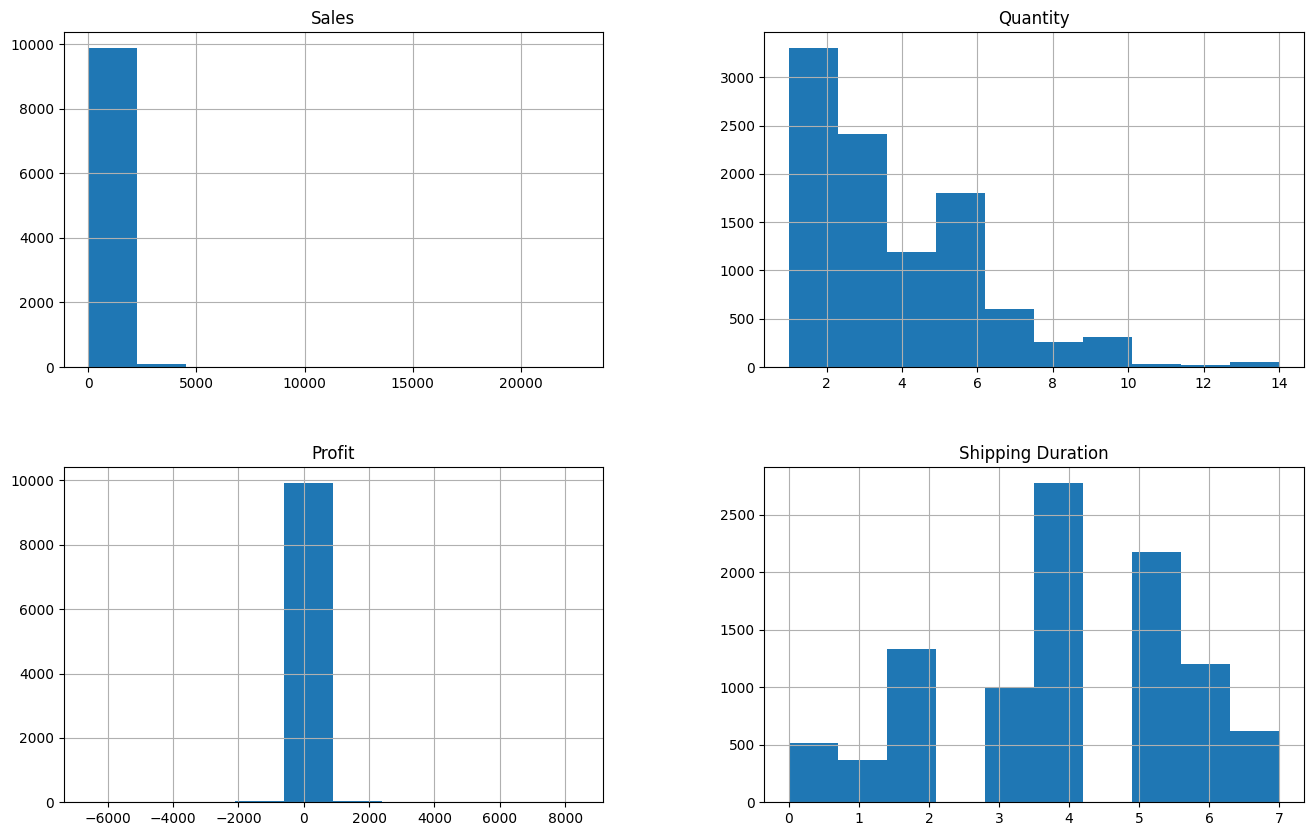

In [46]:
df[["Sales","Quantity","Profit","Shipping Duration"]].hist(figsize=(16, 10))
plt.show()

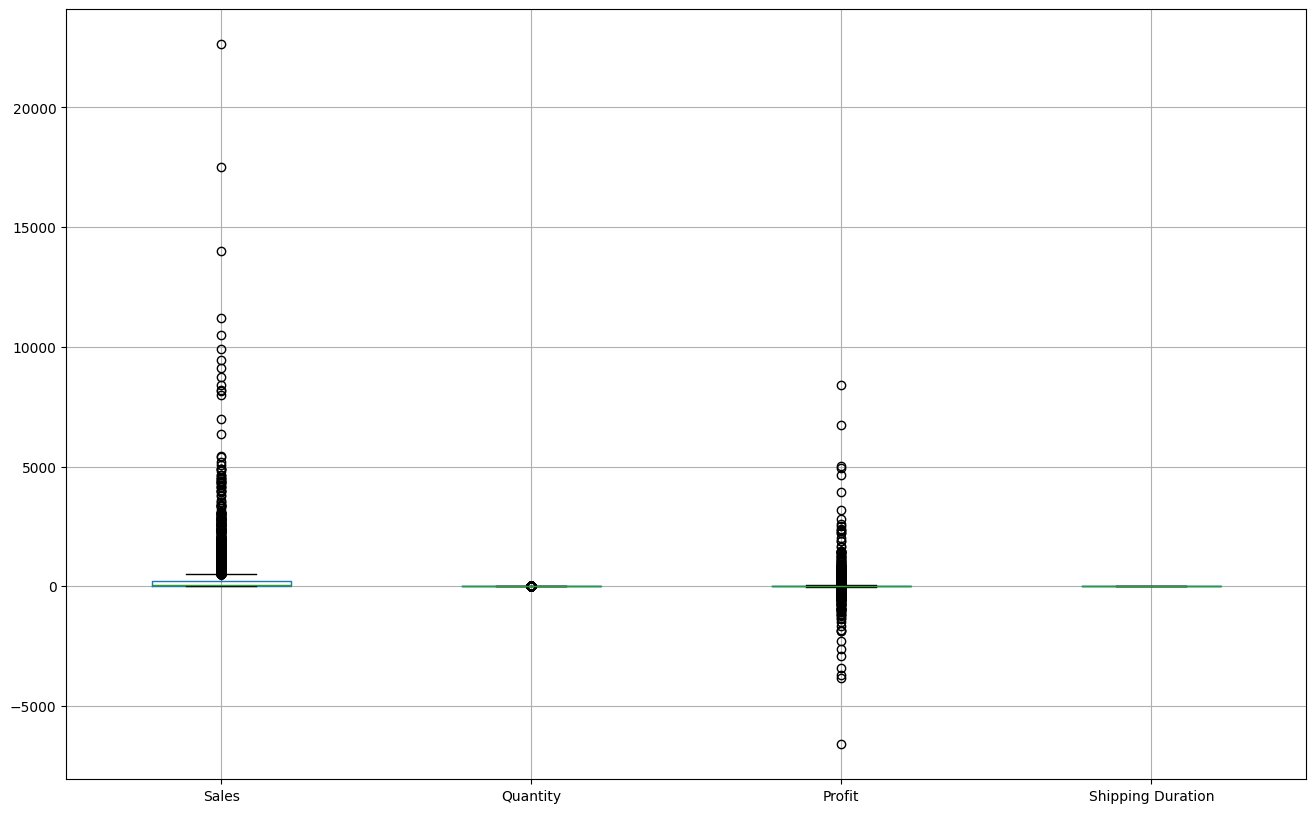

In [47]:
df[["Sales","Quantity","Profit","Shipping Duration"]].boxplot(figsize=(16, 10))
plt.show()

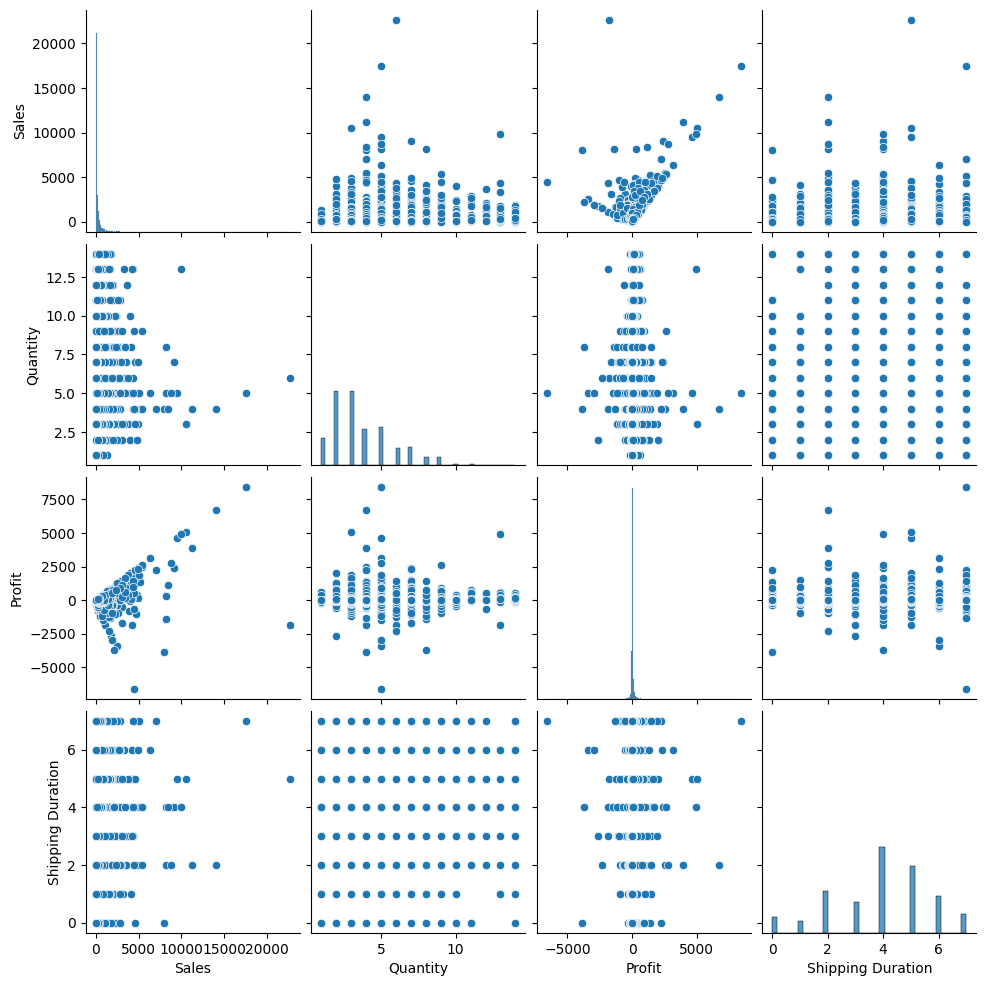

In [48]:
sns.pairplot(df[["Sales","Quantity","Profit","Shipping Duration"]])
plt.show()

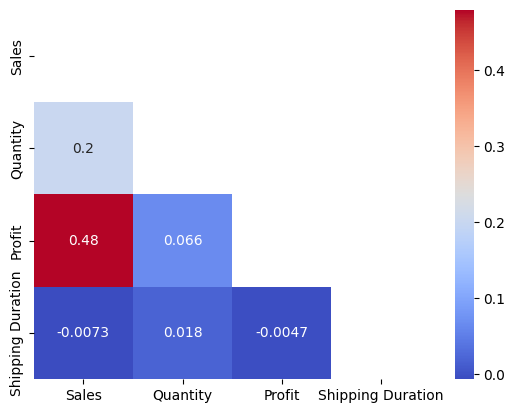

In [49]:
mask = np.triu(np.ones_like(df[["Sales","Quantity","Profit","Shipping Duration"]].corr(), dtype=bool))

sns.heatmap(df[["Sales","Quantity","Profit","Shipping Duration"]].corr(), mask=mask, annot=True, cmap="coolwarm")
plt.show()

In [58]:
df[["Customer ID", "Product ID", "Segment", "State", "City", "Category"]].nunique()

Customer ID     793
Product ID     1862
Segment           3
State            49
City            531
Category          3
dtype: int64

In [75]:
df[["Customer ID", "Product ID", "Segment", "State", "City", "Category", "Sub-Category"]].describe()

,Customer ID,Product ID,Segment,State,City,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994
unique,793,1862,3,49,531,3,17
top,WB-21850,OFF-PA-10001970,Consumer,California,New York City,Office Supplies,Binders
freq,37,19,5191,2001,915,6026,1523


In [69]:
df.groupby("Segment")["Shipping Duration"].mean().sort_values(ascending=False)

Segment
Corporate      4.007947
Consumer       3.942208
Home Office    3.922042
Name: Shipping Duration, dtype: float64

In [74]:
df.groupby("Category")["Shipping Duration"].mean().sort_values(ascending=False)

Category
Office Supplies    3.983239
Technology         3.924201
Furniture          3.917963
Name: Shipping Duration, dtype: float64

In [76]:
df.groupby("State")["Shipping Duration"].mean().sort_values(ascending=False)

State
District of Columbia    5.700000
Wyoming                 5.000000
Maine                   5.000000
Montana                 4.600000
New Mexico              4.513514
Oklahoma                4.484848
Minnesota               4.483146
New Jersey              4.423077
South Dakota            4.416667
Nevada                  4.384615
Tennessee               4.382514
Iowa                    4.366667
Utah                    4.358491
Indiana                 4.335570
Oregon                  4.330645
Delaware                4.270833
Mississippi             4.207547
Arkansas                4.133333
Illinois                4.119919
Alabama                 4.114754
Michigan                4.098039
Missouri                4.075758
Arizona                 4.071429
New York                4.055851
Maryland                4.019048
North Carolina          4.000000
Wisconsin               3.990909
Washington              3.974308
Kansas                  3.958333
Florida                 3.947781
Texa

### Visualisation Clés pour analyse commerciale

In [50]:
# Top 10 des produits les plus vendus
top_10_products = df.groupby('Product Name')['Shipping Duration'].mean().sort_values(ascending=False).head(10)

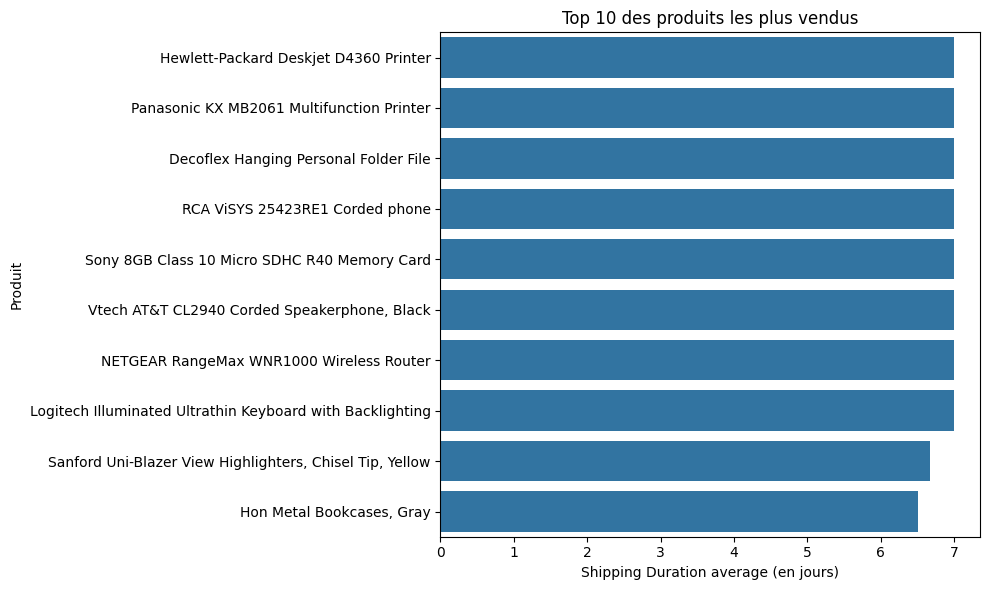

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x= top_10_products.values, y = top_10_products.index)
plt.title("Top 10 des produits les plus vendus")
plt.xlabel("Shipping Duration average (en jours)")
plt.ylabel("Produit")
plt.tight_layout()
plt.show()

In [52]:
# Top 10 des meilleurs clients
top_10_clients = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)

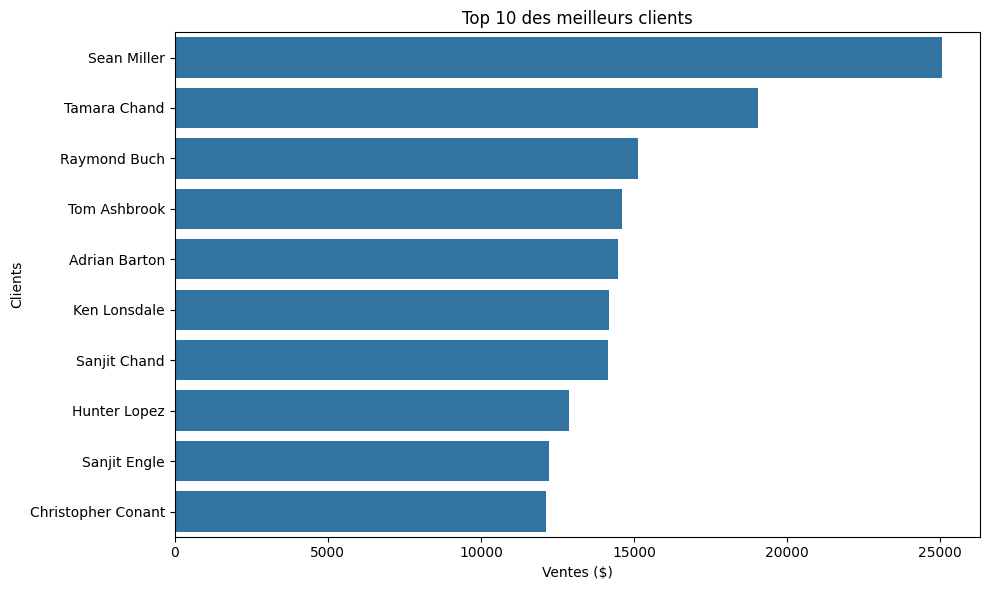

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(x= top_10_clients.values, y = top_10_clients.index)
plt.title("Top 10 des meilleurs clients")
plt.xlabel("Ventes ($)")
plt.ylabel("Clients")
plt.tight_layout()
plt.show()

In [54]:
# Répartition des ventes par région 
sales_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
sales_by_region

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

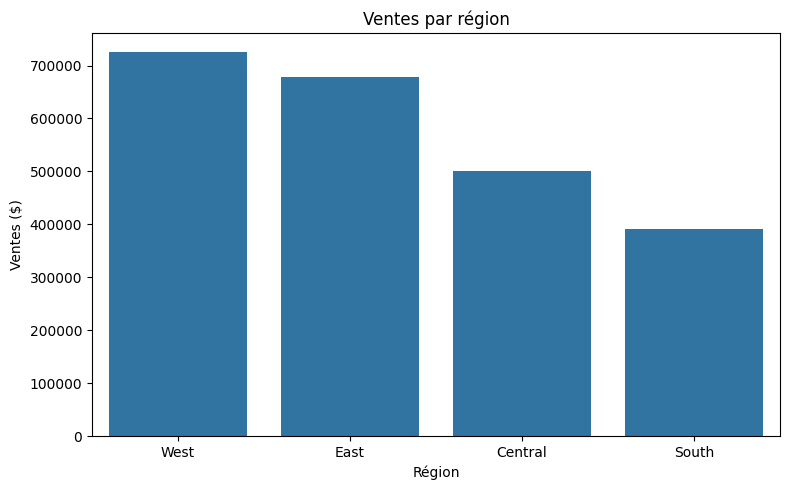

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title("Ventes par région")
plt.ylabel("Ventes ($)")
plt.xlabel("Région")
plt.tight_layout()
plt.show()

In [56]:
# Évolution des ventes dans le temps
df["Order date"] = pd.to_datetime(df['Order Date'])
df["Year-Month"] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Year-Month')['Sales'].sum()

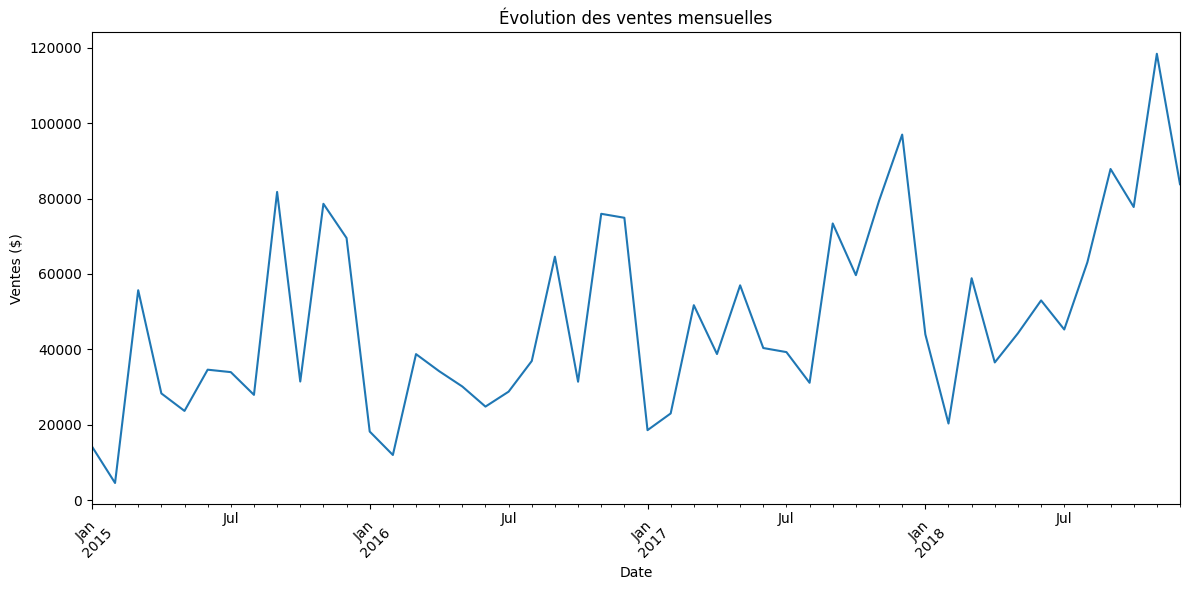

In [57]:
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title("Évolution des ventes mensuelles")
plt.ylabel("Ventes ($)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()